In [8]:
%matplotlib inline

import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import numpy as np

api_key = 'a61f540cf4897b56d88a369afc0e65de6fa6c5e8'

c = Census(
    api_key,
    year=2020
)

# Run Census Search to retrieve data for all states (2020 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns={
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Average Value of Owner-Occupied Home",
        "NAME":"State Name",
        "state": "State Code"
    }

)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Write in state abbreviations for all states
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia":"DC"
}

# Create a new column that corresponds the state abbreviation to the state in State Name column
census_pd["State Abbreviation"] = census_pd["State Name"].apply(lambda state_name: state_abbreviations.get(state_name))

census_pd = census_pd[
    [
        "State Code",
        "State Name",
        "State Abbreviation",
        "Population",
        "Median Age",
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate",
        "Average Value of Owner-Occupied Home"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd


Number of rows in the DataFrame: 52


,State Code,State Name,State Abbreviation,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Average Value of Owner-Occupied Home
0,42,Pennsylvania,PA,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,187500.0
1,06,California,CA,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,538500.0
2,54,West Virginia,WV,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,123200.0
3,49,Utah,UT,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,305400.0
4,36,New York,NY,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,325000.0
5,11,District of Columbia,DC,701974.0,34.1,90842.0,58659.0,103391.0,14.728608,618100.0
6,02,Alaska,AK,736990.0,34.6,77790.0,37094.0,74369.0,10.090910,275600.0
7,12,Florida,FL,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,232000.0
8,45,South Carolina,SC,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243,170100.0
9,38,North Dakota,ND,760394.0,35.2,65315.0,36289.0,77491.0,10.190901,199900.0


In [9]:
import plotly.express as px



fig = px.choropleth(census_pd,locations= 'State Abbreviation',locationmode="USA-states", color='Household Income',
                           color_continuous_scale="Viridis",
                           range_color=(census_pd["Household Income"].min(), census_pd["Household Income"].max()),
                           scope="usa", title='Median Household Income by State 2020'
                          ) 

fig.update_layout(margin={"r":40,"t":50,"l":20,"b":20})
fig.show()


In [10]:
import plotly.express as px
import plotly.io as pio

output_file_path = "2020_MHI.png"

# Use plotly.io.write_image to save the figure as a PNG image
pio.write_image(fig, output_file_path, format="png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
import plotly.express as px



fig = px.choropleth(census_pd,locations= 'State Abbreviation',locationmode="USA-states", color="Average Value of Owner-Occupied Home",
                           color_continuous_scale="Viridis",
                           range_color=(census_pd["Average Value of Owner-Occupied Home"].min(), census_pd["Average Value of Owner-Occupied Home"].max()),
                           scope="usa", title="Average Value of Owner-Occupied Home by State 2020"
                          ) 

fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.show()

In [ ]:
#repeat the same process for 2010

import requests
import pandas as pd
from census import Census

api_key = 'a61f540cf4897b56d88a369afc0e65de6fa6c5e8'

c = Census(
    api_key,
    year=2010
)

# Run Census Search to retrieve data for all states (2010 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
census_pd_2010 = pd.DataFrame(census_data)

# Column renaming
census_pd_2010 = census_pd_2010.rename(
    columns={
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Average Value of Owner-Occupied Home",
        "NAME":"State Name",
        "state": "State Code"
    }

)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd_2010["Poverty Rate"] = 100 * census_pd_2010["Poverty Count"].astype(int) / census_pd_2010["Population"].astype(int)

# Write in state abbreviations for all states
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia":"DC"
}

# Create a new column that corresponds the state abbreviation to the state in State Name column
census_pd_2010["State Abbreviation"] = census_pd_2010["State Name"].apply(lambda state_name: state_abbreviations.get(state_name))

census_pd_2010 = census_pd_2010[
    [
        "State Code",
        "State Name",
        "State Abbreviation",
        "Population",
        "Median Age",
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate",
        "Average Value of Owner-Occupied Home"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd_2010)}")
census_pd_2010


Number of rows in the DataFrame: 52


,State Code,State Name,State Abbreviation,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Average Value of Owner-Occupied Home
0,01,Alabama,AL,4712651.0,37.5,42081.0,22984.0,786544.0,16.690054,117600.0
1,02,Alaska,AK,691189.0,33.8,66521.0,30726.0,64245.0,9.294853,229100.0
2,04,Arizona,AZ,6246816.0,35.5,50448.0,25680.0,933113.0,14.937418,215000.0
3,05,Arkansas,AR,2872684.0,37.2,39267.0,21274.0,502684.0,17.498757,102300.0
4,06,California,CA,36637290.0,34.9,60883.0,29188.0,4919945.0,13.428791,458500.0
5,08,Colorado,CO,4887061.0,35.8,56456.0,30151.0,584184.0,11.953688,236600.0
6,09,Connecticut,CT,3545837.0,39.5,67740.0,36775.0,314306.0,8.864085,296500.0
7,10,Delaware,DE,881278.0,38.3,57599.0,29007.0,93857.0,10.650101,242300.0
8,11,District of Columbia,DC,584400.0,34.3,58526.0,42078.0,101767.0,17.413929,443300.0
9,12,Florida,FL,18511620.0,40.3,47661.0,26551.0,2502365.0,13.517807,205600.0


In [ ]:
fig = px.choropleth(census_pd_2010,locations= 'State Abbreviation',locationmode="USA-states", color='Household Income',
                           color_continuous_scale="Viridis",
                           range_color=(census_pd_2010["Household Income"].min(), census_pd_2010["Household Income"].max()),
                           scope="usa", title='Median Household Income by State 2010'
                          ) 

fig.update_layout(margin={"r":40,"t":50,"l":20,"b":20})
fig.show()

In [ ]:
#Create Maps for 2010
fig = px.choropleth(census_pd_2010,locations= 'State Abbreviation',locationmode="USA-states", color="Average Value of Owner-Occupied Home",
                           color_continuous_scale="Viridis",
                           range_color=(census_pd_2010["Average Value of Owner-Occupied Home"].min(), census_pd_2010["Average Value of Owner-Occupied Home"].max()),
                           scope="usa", title="Average Value of Owner-Occupied Home by State 2010"
                          ) 

fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.show()

In [ ]:
#Merge Datasets
import pandas as pd
merged_data = pd.merge(census_pd,census_pd_2010,on=['State Name','State Abbreviation'])
merged_data.head()


,State Code_x,State Name,State Abbreviation,Population_x,Median Age_x,Household Income_x,Per Capita Income_x,Poverty Count_x,Poverty Rate_x,Average Value of Owner-Occupied Home_x,State Code_y,Population_y,Median Age_y,Household Income_y,Per Capita Income_y,Poverty Count_y,Poverty Rate_y,Average Value of Owner-Occupied Home_y
0,42,Pennsylvania,PA,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,187500.0,42,12612705.0,39.8,50398.0,27049.0,1509858.0,11.970929,159300.0
1,06,California,CA,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,538500.0,06,36637290.0,34.9,60883.0,29188.0,4919945.0,13.428791,458500.0
2,54,West Virginia,WV,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,123200.0,54,1840802.0,41.1,38380.0,21232.0,310495.0,16.867376,94500.0
3,49,Utah,UT,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,305400.0,49,2657236.0,28.8,56330.0,23139.0,283536.0,10.670336,218100.0
4,36,New York,NY,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,325000.0,36,19229752.0,37.7,55603.0,30948.0,2650166.0,13.781592,303900.0


In [ ]:
# Rename columns
merged_data = merged_data.rename(columns={
    "Average Value of Owner-Occupied Home_x": "Average Value of Owner-Occupied Home 2020",
    "Average Value of Owner-Occupied Home_y": "Average Value of Owner-Occupied Home 2010"
})

# Select specific columns
merged_data = merged_data[["State Abbreviation", "Average Value of Owner-Occupied Home 2020", "Average Value of Owner-Occupied Home 2010"]]

# Display the resulting DataFrame
merged_data.head()

,State Abbreviation,Average Value of Owner-Occupied Home 2020,Average Value of Owner-Occupied Home 2010
0,PA,187500.0,159300.0
1,CA,538500.0,458500.0
2,WV,123200.0,94500.0
3,UT,305400.0,218100.0
4,NY,325000.0,303900.0


In [ ]:
#import 2015 data and merge with 2020 and 2010

#repeat the same process for 2015

import requests
import pandas as pd
from census import Census

api_key = 'a61f540cf4897b56d88a369afc0e65de6fa6c5e8'

c = Census(
    api_key,
    year=2015
)

# Run Census Search to retrieve data for all states (2000 ACS5 Census)
census_data2015 = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
census_pd_2015 = pd.DataFrame(census_data2015)

# Column renaming
census_pd_2015 = census_pd_2015.rename(
    columns={
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Average Value of Owner-Occupied Home",
        "NAME":"State Name",
        "state": "State Code"
    }

)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd_2015["Poverty Rate"] = 100 * census_pd_2015["Poverty Count"].astype(int) / census_pd_2015["Population"].astype(int)

# Write in state abbreviations for all states
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia":"DC"
}

# Create a new column that corresponds the state abbreviation to the state in State Name column
census_pd_2015["State Abbreviation"] = census_pd_2015["State Name"].apply(lambda state_name: state_abbreviations.get(state_name))

census_pd_2015 = census_pd_2015[
    [
        "State Code",
        "State Name",
        "State Abbreviation",
        "Population",
        "Median Age",
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate",
        "Average Value of Owner-Occupied Home"
    ]
]


census_data_merged = pd.merge(merged_data,census_pd_2015,on=['State Abbreviation'])
census_data_merged.head()


,State Abbreviation,Average Value of Owner-Occupied Home 2020,Average Value of Owner-Occupied Home 2010,State Code,State Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Average Value of Owner-Occupied Home
0,PA,187500.0,159300.0,42,Pennsylvania,12779559.0,40.5,53599.0,29291.0,1666569.0,13.040896,166000.0
1,CA,538500.0,458500.0,06,California,38421464.0,35.8,61818.0,30318.0,6135142.0,15.968007,385500.0
2,WV,123200.0,94500.0,54,West Virginia,1851420.0,41.8,41751.0,23450.0,323384.0,17.466809,103800.0
3,UT,305400.0,218100.0,49,Utah,2903379.0,30.1,60727.0,24686.0,351601.0,12.110062,215900.0
4,NY,325000.0,303900.0,36,New York,19673174.0,38.1,59269.0,33236.0,3005943.0,15.279400,283400.0


In [ ]:
#filter merged data
census_data_merged['Average Value of Owner-Occupied Home 2015']=census_data_merged['Average Value of Owner-Occupied Home']
census_data_merged = census_data_merged[['State Abbreviation','Average Value of Owner-Occupied Home 2010','Average Value of Owner-Occupied Home 2015','Average Value of Owner-Occupied Home 2020']]
census_data_merged.head()

,State Abbreviation,Average Value of Owner-Occupied Home 2010,Average Value of Owner-Occupied Home 2015,Average Value of Owner-Occupied Home 2020
0,PA,159300.0,166000.0,187500.0
1,CA,458500.0,385500.0,538500.0
2,WV,94500.0,103800.0,123200.0
3,UT,218100.0,215900.0,305400.0
4,NY,303900.0,283400.0,325000.0


Text(0.5, 1.0, 'Average Value of Owner-Occupied Homes Over Time')

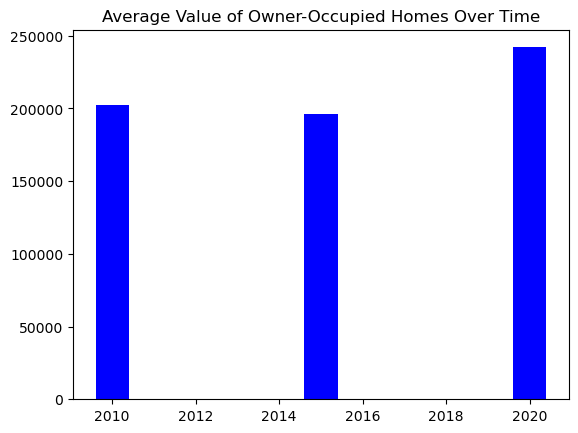

In [ ]:
#Create a plot that shows how the average home value has every 5 years changed from 2010 to 2020

HomeVal_Avg2010 = census_data_merged['Average Value of Owner-Occupied Home 2010'].mean()
HomeVal_Avg2015 = census_data_merged['Average Value of Owner-Occupied Home 2015'].mean()
HomeVal_Avg2020 = census_data_merged['Average Value of Owner-Occupied Home 2020'].mean()

years = [2010,2015,2020]
HomeVal = [HomeVal_Avg2010,HomeVal_Avg2015,HomeVal_Avg2020]

plt.bar(years, HomeVal,color="blue", linewidth=1)
plt.title("Average Value of Owner-Occupied Homes Over Time")